# 국내 COVID-19 확진자 시계열 분석

In [58]:
from dateutil.parser import parse
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
import statsmodels.tsa.api as tsa

matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['axes.unicode_minus'] = False

In [59]:
df = pd.read_excel('korea_covid.xlsx', skiprows = [0, 1, 2, 3])
df

,일자,계(명),국내발생(명),해외유입(명),사망(명),Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,누적(명),489484,473527,15957,4019.5,NaN,NaN,NaN,NaN,NaN
1,2020-01-20 00:00:00,1,-,1,-,NaN,NaN,NaN,NaN,NaN
2,2020-01-21 00:00:00,0,-,-,-,NaN,NaN,NaN,NaN,NaN
3,2020-01-22 00:00:00,0,-,-,-,NaN,NaN,NaN,NaN,NaN
4,2020-01-23 00:00:00,0,-,-,-,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
685,2021-12-04 00:00:00,5352,5327,25,70,NaN,NaN,NaN,NaN,NaN
686,2021-12-05 00:00:00,5126,5103,23,43,NaN,NaN,NaN,NaN,NaN
687,2021-12-06 00:00:00,4324,4295,29,41,NaN,NaN,NaN,NaN,NaN
688,2021-12-07 00:00:00,4954,4924,30,64,NaN,NaN,NaN,NaN,NaN


In [60]:
df.columns

Index(['일자', '계(명)', '국내발생(명)', '해외유입(명)', '사망(명)', 'Unnamed: 5', 'Unnamed: 6',
       'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9'],
      dtype='object')

In [61]:
df.shape

(690, 10)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   일자          690 non-null    object 
 1   계(명)        690 non-null    int64  
 2   국내발생(명)     690 non-null    object 
 3   해외유입(명)     690 non-null    object 
 4   사망(명)       690 non-null    object 
 5   Unnamed: 5  0 non-null      float64
 6   Unnamed: 6  0 non-null      float64
 7   Unnamed: 7  0 non-null      float64
 8   Unnamed: 8  0 non-null      float64
 9   Unnamed: 9  0 non-null      float64
dtypes: float64(5), int64(1), object(4)
memory usage: 54.0+ KB


In [63]:
df.drop(columns=['Unnamed: 5', 'Unnamed: 6',
       'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9'], inplace=True)

In [64]:
df

,일자,계(명),국내발생(명),해외유입(명),사망(명)
0,누적(명),489484,473527,15957,4019.5
1,2020-01-20 00:00:00,1,-,1,-
2,2020-01-21 00:00:00,0,-,-,-
3,2020-01-22 00:00:00,0,-,-,-
4,2020-01-23 00:00:00,0,-,-,-
...,...,...,...,...,...
685,2021-12-04 00:00:00,5352,5327,25,70
686,2021-12-05 00:00:00,5126,5103,23,43
687,2021-12-06 00:00:00,4324,4295,29,41
688,2021-12-07 00:00:00,4954,4924,30,64


In [65]:
df['국내발생(명)'].replace({'-':0}, inplace=True)

In [66]:
df['해외유입(명)'].replace({'-':0}, inplace=True)

In [67]:
df['사망(명)'].replace({'-':0}, inplace=True)

In [68]:
df.drop(index=0, inplace=True)
df

,일자,계(명),국내발생(명),해외유입(명),사망(명)
1,2020-01-20 00:00:00,1,0,1,0.0
2,2020-01-21 00:00:00,0,0,0,0.0
3,2020-01-22 00:00:00,0,0,0,0.0
4,2020-01-23 00:00:00,0,0,0,0.0
5,2020-01-24 00:00:00,1,0,1,0.0
...,...,...,...,...,...
685,2021-12-04 00:00:00,5352,5327,25,70.0
686,2021-12-05 00:00:00,5126,5103,23,43.0
687,2021-12-06 00:00:00,4324,4295,29,41.0
688,2021-12-07 00:00:00,4954,4924,30,64.0


In [69]:
df.describe()

,계(명),국내발생(명),해외유입(명),사망(명)
count,689.000000,689.000000,689.000000,689.000000
mean,710.426705,687.267054,23.159652,5.833817
std,922.065790,916.071979,19.062719,8.713147
min,0.000000,0.000000,0.000000,0.000000
25%,69.000000,47.000000,12.000000,1.000000
50%,429.000000,405.000000,21.000000,3.000000
75%,924.000000,909.000000,30.000000,7.000000
max,7175.000000,7142.000000,309.000000,70.000000


In [70]:
df

,일자,계(명),국내발생(명),해외유입(명),사망(명)
1,2020-01-20 00:00:00,1,0,1,0.0
2,2020-01-21 00:00:00,0,0,0,0.0
3,2020-01-22 00:00:00,0,0,0,0.0
4,2020-01-23 00:00:00,0,0,0,0.0
5,2020-01-24 00:00:00,1,0,1,0.0
...,...,...,...,...,...
685,2021-12-04 00:00:00,5352,5327,25,70.0
686,2021-12-05 00:00:00,5126,5103,23,43.0
687,2021-12-06 00:00:00,4324,4295,29,41.0
688,2021-12-07 00:00:00,4954,4924,30,64.0


In [71]:
total = df['계(명)'].sum()
print("총 확진자: ", total)
total1 = df['사망(명)'].sum()
print("총 사망자: ", round(total1))

총 확진자:  489484
총 사망자:  4020


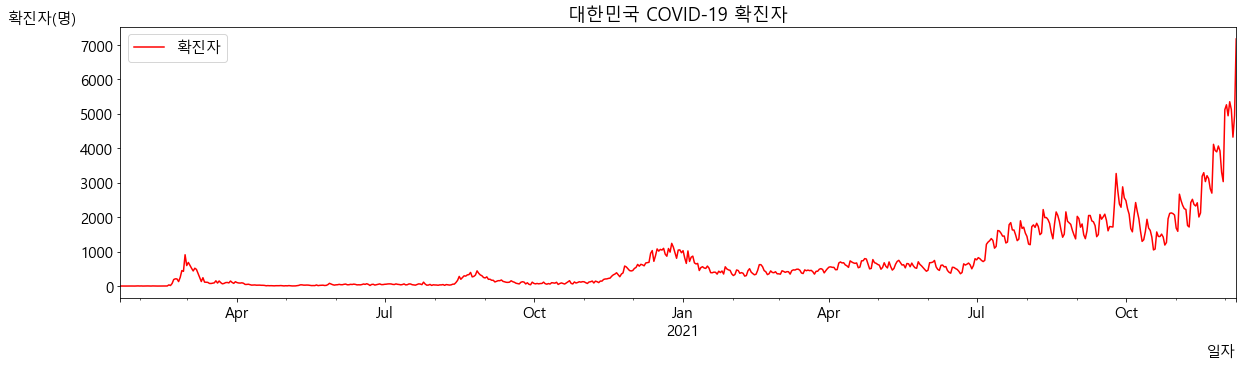

In [72]:
df.plot('일자', '계(명)', color='r', figsize=(20, 5), label='확진자')
plt.title('대한민국 COVID-19 확진자')
plt.legend(loc='upper left')
plt.xlabel('일자', loc = 'right')
plt.ylabel('확진자(명)', rotation=0, loc='top');

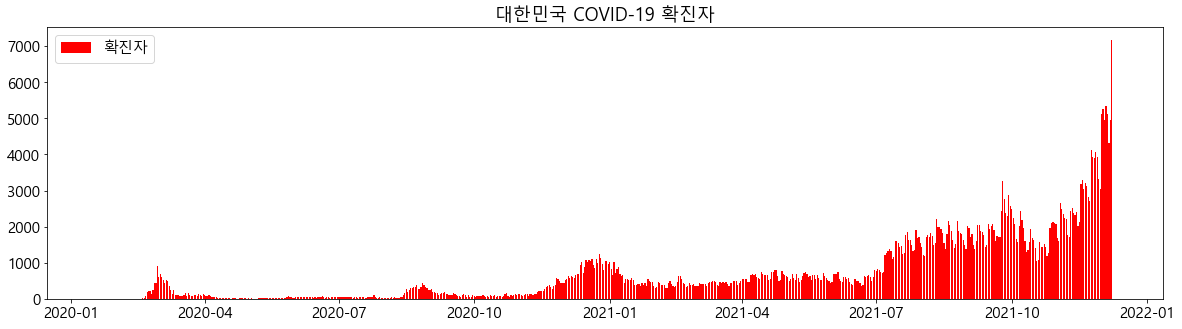

In [73]:
plt.figure(figsize=(20, 5))
plt.title('대한민국 COVID-19 확진자')
plt.bar(df['일자'], df['계(명)'], label='확진자', color='red')
plt.legend(ncol=1);

In [74]:
df_time = pd.pivot_table(data = df, index = '일자', values = '계(명)', aggfunc = 'sum')
df_time.head()

,계(명)
일자,
2020-01-20,1
2020-01-21,0
2020-01-22,0
2020-01-23,0
2020-01-24,1


In [75]:
y = df_time['계(명)'].resample('1D').mean()

In [76]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10
plt.show()

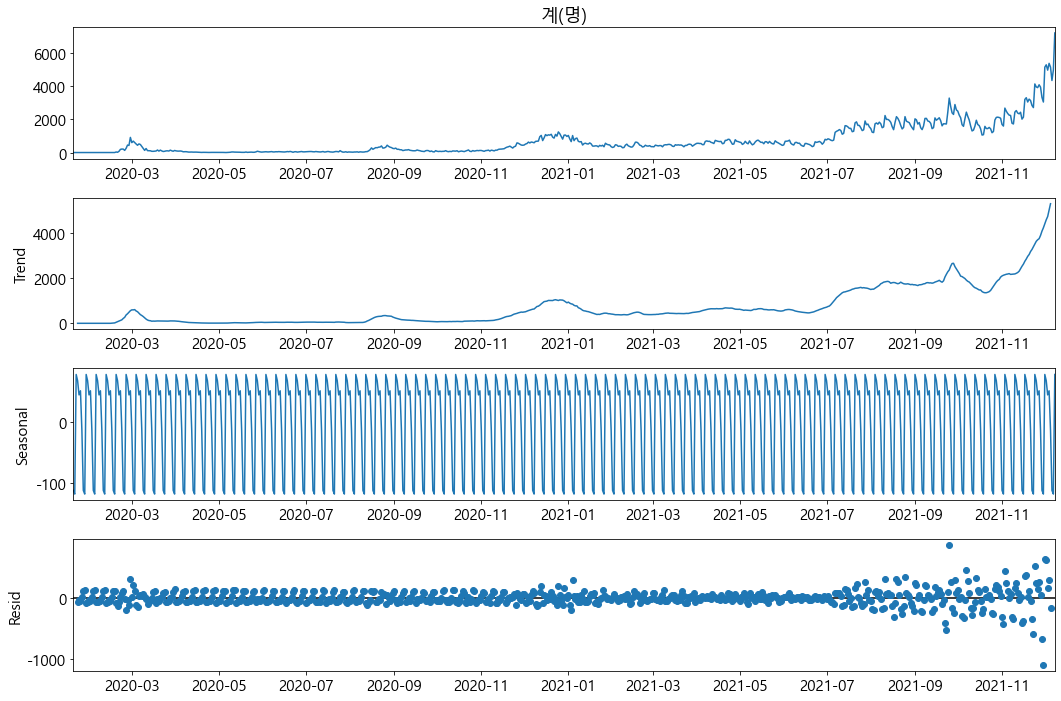

In [77]:
ms = tsa.seasonal_decompose(y, model='additive')
fig = ms.plot()

In [78]:
import itertools

In [79]:
p = d = q =range (0, 2)
pdq = list(itertools.product(p, d, q))
season_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [80]:
season_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [81]:
p_list = []
p_season_list = []
results_AIC_list = []

In [82]:
for param in pdq:
    for p_season in season_pdq:
        try:
            mod = tsa.statespace.SARIMAX(y,order = param,
                                        seasonal_order = p_season,
                                        enforce_stationarity = False,
                                        enforce_inveribility = False)
            results = mod.fit()
            p_list.append(param)
            p_season_list.append(p_season)
            results_AIC_list.append(results.aic)
        except:
            continue

In [83]:
ARIMA_list = pd.DataFrame({'Parameter':p_list,'Seasonal':p_season_list,'AIC':results_AIC_list})
ARIMA_list.to_excel('arima_model_list.xlsx')

In [84]:
ARIMA_list.sort_values(by='AIC')

,Parameter,Seasonal,AIC
63,"(1, 1, 1)","(1, 1, 1, 12)",8940.298965
31,"(0, 1, 1)","(1, 1, 1, 12)",8941.738038
47,"(1, 0, 1)","(1, 1, 1, 12)",8950.184365
23,"(0, 1, 0)","(1, 1, 1, 12)",8953.211413
55,"(1, 1, 0)","(1, 1, 1, 12)",8954.874716
...,...,...,...
2,"(0, 0, 0)","(0, 1, 0, 12)",10087.235497
9,"(0, 0, 1)","(0, 0, 1, 12)",10204.684941
1,"(0, 0, 0)","(0, 0, 1, 12)",10845.237887
8,"(0, 0, 1)","(0, 0, 0, 12)",10934.599105


In [85]:
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                               계(명)   No. Observations:                  689
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -4465.149
Date:                            Sun, 12 Dec 2021   AIC                           8940.299
Time:                                    20:54:21   BIC                           8962.775
Sample:                                01-20-2020   HQIC                          8949.010
                                     - 12-08-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9606      0.014    -70.033      0.000      -0.988      -0.934
ma.L1          0.9989      0.045   

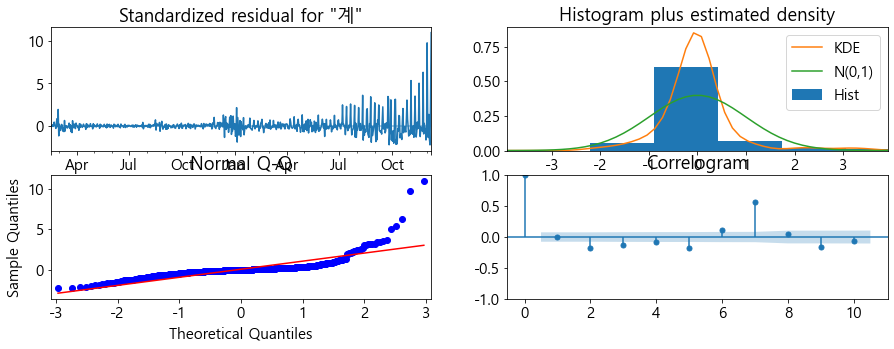

In [86]:
results.plot_diagnostics(figsize=(15, 5));

In [87]:
results.get_prediction();

In [88]:
y.head()

일자
2020-01-20    1
2020-01-21    0
2020-01-22    0
2020-01-23    0
2020-01-24    1
Freq: D, Name: 계(명), dtype: int64

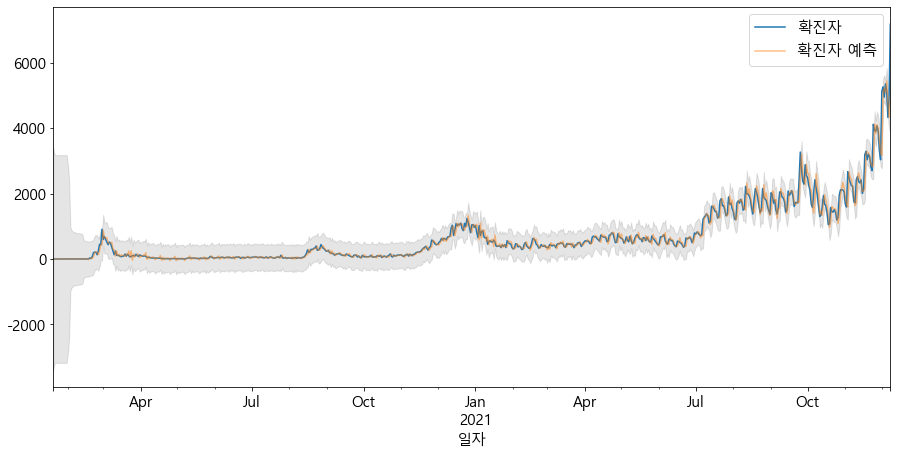

In [89]:
prediction = results.get_prediction(start=pd.to_datetime('2020-01-20'), dynamic=False)
prediction_c = prediction.conf_int()

ax = y.plot(label='확진자')
prediction.predicted_mean.plot(ax=ax, label='확진자 예측', alpha=.5, figsize=(15, 7))
ax.fill_between(prediction_c.index,prediction_c.iloc[:, 0],prediction_c.iloc[:, 1], color='k', alpha=.1)

plt.legend();

In [90]:
prediction = results.get_prediction(start=pd.to_datetime('2020-01-20'), dynamic=False)
pd.DataFrame(prediction.predicted_mean).reset_index();

In [91]:
y_forecast = prediction.predicted_mean
y_truth = y['2020-01-20':]
mse = ((y_forecast - y_truth) ** 2).mean()
print('MSE {}'.format(round(mse, 2)))

MSE 39097.49


In [92]:
prediction_u = results.get_forecast(steps=100)

In [93]:
prediction_u.predicted_mean

2021-12-09    7188.809988
2021-12-10    7187.749054
2021-12-11    7482.446522
2021-12-12    7526.412444
2021-12-13    6935.807264
                 ...     
2022-03-14    8481.595197
2022-03-15    8507.502458
2022-03-16    8497.424001
2022-03-17    8529.862384
2022-03-18    8516.370845
Freq: D, Name: predicted_mean, Length: 100, dtype: float64

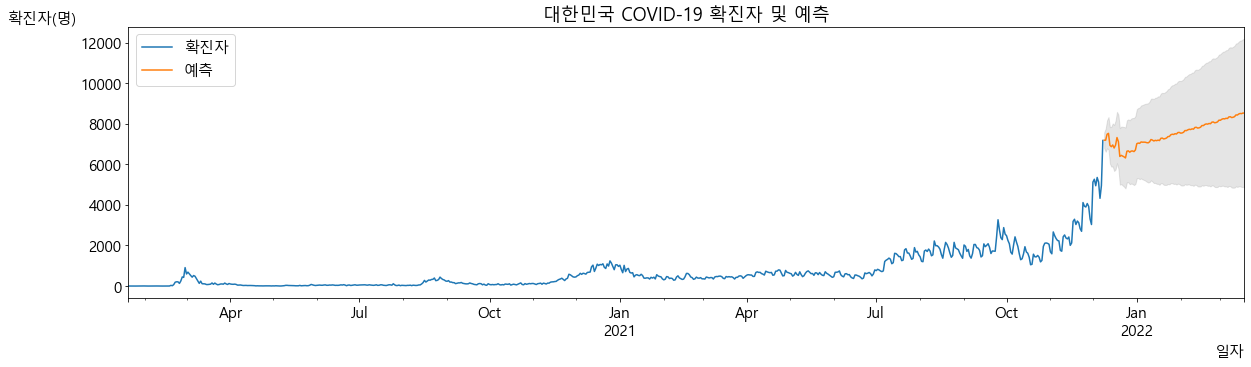

In [96]:
prediction_u = results.get_forecast(steps=100)
prediction_c = prediction_u.conf_int()
ax = y.plot(label='확진자', figsize=(20, 5))
prediction_u.predicted_mean.plot(ax=ax, label='예측')
ax.fill_between(prediction_c.index,
                 prediction_c.iloc[:, 0],
                 prediction_c.iloc[:, 1], color='grey', alpha=.2)

plt.title('대한민국 COVID-19 확진자 및 예측')
plt.legend(loc='upper left')
plt.xlabel('일자', loc = 'right')
plt.ylabel('확진자(명)', rotation=0, loc='top')

plt.savefig('국내 확진자 및 예측.png', dpi=100);